## Preprocessing 

In [1]:
# StandardScalar
# RobustScalar
# MinMaxScalar
# Normalizer

### When to do scaling?

In [2]:
# In general, algorithms that exploit distances or similarities (e.g. in form of scalar 
# product) between data samples, such as k-NN and SVM, are sensitive to feature 
# transformations.

# Graphical-model based classifiers, such as Fisher LDA or Naive Bayes, as well as 
# Decision trees and Tree-based ensemble methods (RF, XGB) are invariant to feature scaling,
# but still it might be a good idea to rescale/standartize your data.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y)



In [5]:
from sklearn.svm import SVC

model = SVC().fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test, y_test))

0.9131455399061033 0.9230769230769231


In [6]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model_ws = SVC().fit(X_train_scaled, y_train)
print(model_ws.score(X_train_scaled, y_train), model_ws.score(X_test_scaled, y_test))

0.9835680751173709 0.972027972027972


In [8]:
# Scaling imporved the percentages by so much!!

## PCA (Principal Component Analysis)

In [9]:
# PCA is an important dimensionality reduction technique

In [10]:
# It helps reduce the number of features (columns), by clubbing together similiar features
# that have high correlation

In [11]:
# https://www.youtube.com/watch?v=g-Hb26agBFg

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
X_train.shape

(426, 30)

In [16]:
X_pca.shape

(426, 2)

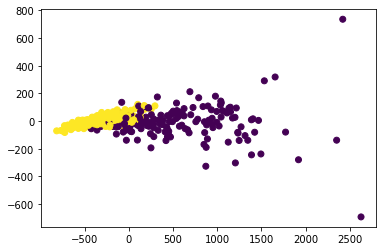

In [23]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)

In [24]:
# in this example, we have used PCA to perform dimensionality reduction and convert 
# 30 features into just 2 features, which can now be visualized using a 2D plot

In [25]:
# These 2 are called the FIRST TWO PRINCIPAL COMPONENTS


### First scaling, then applying PCA

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
pca = PCA(2)

X_train = pca.fit_transform(X_train)


In [28]:
X_train.shape

(426, 2)

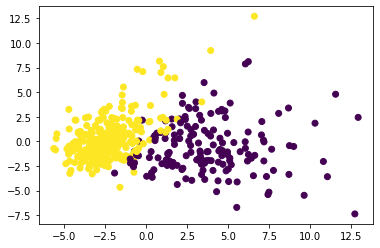

In [30]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [31]:
# Scaling helps distribute data more evenly

### Visualizing the coefficients using heat map

In [36]:
pca.components_

array([[ 0.22415314,  0.09880255,  0.23235999,  0.22602575,  0.13914669,
         0.23969565,  0.26144846,  0.26522591,  0.13403613,  0.04833238,
         0.20889413,  0.0151218 ,  0.21348929,  0.20955907,  0.01761969,
         0.1632298 ,  0.14498905,  0.18488137,  0.03825666,  0.09687791,
         0.23171294,  0.09867397,  0.2398362 ,  0.22967854,  0.1195656 ,
         0.20537685,  0.22651073,  0.25310988,  0.1147308 ,  0.11841085],
       [-0.22999908, -0.04875066, -0.21204795, -0.22440074,  0.17979992,
         0.15434126,  0.06895459, -0.03607525,  0.18487957,  0.36661614,
        -0.09413888,  0.09049017, -0.0786332 , -0.14105499,  0.20384418,
         0.2468965 ,  0.21450122,  0.14500318,  0.16601987,  0.29116617,
        -0.21724267, -0.03203275, -0.19838647, -0.21389666,  0.17299532,
         0.14620811,  0.10925098, -0.00774149,  0.12934971,  0.28325286]])

Text(0, 0.5, 'Principal components')

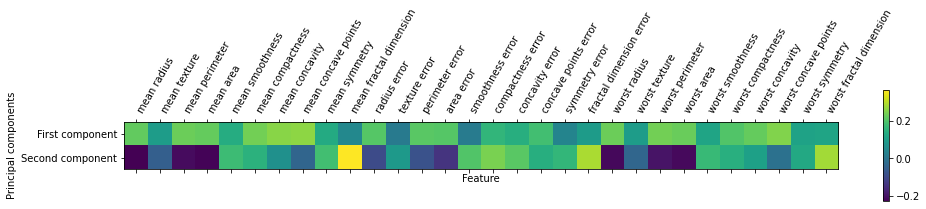

In [37]:
plt.matshow(pca.components_, cmap="viridis")

plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Text(0, 0.5, 'Principal components')

<Figure size 1296x1296 with 0 Axes>

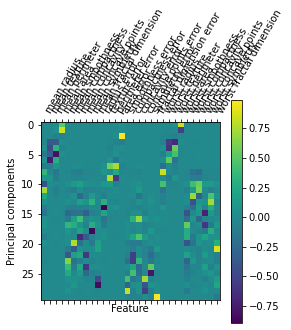

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

pca = PCA(n_components=30)
X_train = pca.fit_transform(X_train)

plt.figure(figsize=(18,18))
plt.matshow(pca.components_, cmap="viridis")

plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")